- 심층 신경망(DNN)
    - 입력계층과 출력계층 사이에 여러 계층이 포함된 경우
    - 중간에 포함된 계층을 -> 은닉계층(Hidden Layer)이라고 표현함
    - 은닉계층은 입력된 데이터를 다음 계층으로 넘겨주기 위한 활성화 함수가 필요함
        - 보통 relu를 주로 사용함

1. 패션데이터셋 읽어들이기 : 변수는 기존과 동일
2. 데이터 스케일링 : 변수는 기존과 동일
3. 훈련 : 검증 = 8:2로 분리 : 변수는 기존과 동일

In [ ]:
### <텐서플로 프레임워크 사용>
# - 사용 라이브러리 : keras

### 텐서플로우 프레임워크(패키지라고도 칭함)
import tensorflow as tf

### 케라스 라이브러리 불러들이기
from tensorflow import keras

### 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 훈련 및 테스트 데이터로 분류하는 라이브러리
from sklearn.model_selection import train_test_split

### 딥러닝 랜덤 규칙 정의하기
# - 딥러닝에서의 랜덤 규칙은 항상 일정하게 유지되지는 않음
# - 딥러닝 모델 내부에서 훈련을 위한 데이터를 임의로 추출하여 사용(사람이 관여 안함)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
### keras에서 제공하는 데이터 라이브러리 : Fashion MNIST
# - 이미지 데이터로 되어있음

### 데이터셋 읽어들이기
# - 반환되는 데이터 : train(독립, 종속), test(독립, 종속) 총 4개 데이터 변수로 반환됨
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
### 이미지 픽셀 데이터를 0~1사이의 값으로 변환하기
# - 이미지 픽셀 데이터의 범위는 0~255의 범위값으로 구성되어 있음
# - 따라서, 각 픽셀의 값을 255로 나눠주면, 0~1사이의 값으로 일반화가 가능함
# - 훈련 및 테스트 독립변수의 데이터를 모두 255로 나누어서 전처리하기
#   (255.0의 소숫점으로 나눠줌)
train_scaled_255 = train_input / 255.0
test_scaled_255  = test_input / 255.0

In [4]:
### 훈련(train_scaled, train_target)
### 검증(val_scaled, val_target)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled_255, train_target, test_size=0.2, random_state=42
)

print(train_scaled.shape,   train_target.shape)
print(val_scaled.shape,     val_target.shape)
print(test_scaled_255.shape, test_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


### 심층신경망(Deep Neural Network, DNN)

- 인공신경망(Artificial Neural Network, ANN)
    - 은닉계층(Hidden Layer)이 없는 모델
    - 입력계층 + 출력계층 or 입/출력 계층만 존재하는 모델

- 심층신경망(Deep Neural Network, DNN)
    - 은닉계층(Hidden Layer)이 있는 모델
    - 입력계층 + 은닉계층....n개 + 출력계층

In [5]:
### 1 모델 생성하기 : 변수명  model
model = keras.Sequential()
model

In [6]:
### 2. 입력계층 생성하겨 모델에 추가하기
# - 차원을 변환하는 전처리 계층을 입력계층으로 사용
#   -> 모델에 사용되는 데이터는 2차원을 사용해야함
#   -> (축, 행, 열) => (행, 열)로 변환
#                      --> 축이 행이됨, (행*열)을 열로 통합
# - Flatten : 차원변경 전처리 계층
#           : 전처리 계층은 훈련에 사용되지 않는 계층임(데이터 전처리만 수행함)
#           : 보통 입력된 데이터의 갯수가 출력으로 사용됨
#
# - input_shape을 사용하여 입력 계층의 역할도 함께 수행함
dense1 = keras.layers.Flatten(input_shape=(28, 28))

### 모델에 계층 추가하기
model.add(dense1)
model

In [7]:
### 은닉계층(Hidden Layer) 생성 및 모델에 추가하기
# - 입력으로 받아올 데이터 갯수 :
# - 다음계층으로 넘겨줄 데이터 갯수 : 100개(출력 갯수)
# - 훈련 중 분류에 사용할 활성화함수 activation :
hidden_layer = keras.layers.Dense(units=100, activation="relu")

### 모델에 추가하기
model.add(hidden_layer)

In [8]:
### 출력계층 생성 및 모델에 추가하기
# - 출력 데이터 갯수 : 종속변수의 범주 갯수를 정의함
output_layer = keras.layers.Dense(units=10, activation="softmax")

model.add(output_layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 모델 생성하는 함수 정의하기

- 함수 프로세스
    - 함수 이름 : model_fn
    - 매개변수 : add_layer (은닉계층이 있으면 모델 중간에 추가, 없으면 추가 안함)
    - 모델 변수명 : model
    - 입력계층 모델에 추가 : 1차원 전처리 계층 사용
    - 은닉계층 추가 조건 : 여러개의 은니계층이 넘어 올 수 있음
        - add_layer의 값이 None이 아니면, 은닉계층을 모델에 추가
        - add_layer의 값이 None이면, 추가하지 않기
    - 출력계층 모델에 추가
    - 모델을 반환(리턴)

    - -> 함수 호출 시 인자값으로 사용할 -> 테스트를 위한 은닉계층-1
        - 출력 100개, 활성화함수 relu 사용
        - 단, 여러개의 은닉계층을 인자값으로 넘길 수 있도록 처리

    - 은닉계층 2개를 사용하는 경우 추가 은닉계층-2
        - -> 출력 50개, 활성화함수 relu 사용

In [10]:
def model_fn(add_layer = None) :
    ### 모델 생성하기
    model = keras.Sequential()

    ### 입력계층(차원축소 전처리 계층)  생성 및 모델에 추가하기
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    ### 은닉계층 추가여부 확인하기
    if add_layer != None :
        ### 은닉계층 여러개를 리스트 타입으로 받아서 처리할 예정
        for layer in add_layer :
            model.add(layer)

    ### 출력계층
    model.add(keras.layers.Dense(units=10, activation="softmax"))

    ### 모델 반환하기
    return model


In [11]:
### 함수 호출하여 모델 생성하기
# - 은닉계층 없이 생성
model_temp = model_fn()
model_temp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
### 함수 호출하여 모델 생성하기
# - 은닉계층 추가
hidden_layer1 = keras.layers.Dense(units=100, activation="relu")

model_temp = model_fn([hidden_layer1])
model_temp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
### 함수 호출하여 모델 생성하기
# - 은닉계층 추가
hidden_layer1 = keras.layers.Dense(units=100, activation="relu")
hidden_layer2 = keras.layers.Dense(units=50, activation="relu")

model_temp = model_fn([hidden_layer1, hidden_layer2])
model_temp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


### 모델 환경설정하기(역전파: 손실을 줄이기 위한 평가 등을 진행)

In [ ]:
### 다중분류를 진행하며, 종속변수의 값 형태는 0, 1, 2, 
# - 평가 결과는 손실율과 정확도까지 출력
model_temp.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

### 심층신경망 훈련 시키기

In [15]:
# - 훈련 횟수 50회
with tf.device("/CPU:0") :
    model_temp.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5346 - accuracy: 0.8090
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3922 - accuracy: 0.8547
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3566 - accuracy: 0.8705
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8783
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3247 - accuracy: 0.8827
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8867
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8885
Epoch 8/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3069 - accuracy: 0.8913
Epoch 9/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3007 - accuracy: 0.8946
Epoch 10/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.297

In [16]:
### 훈련 결과에 대한 히스토리 정보 받아오기
with tf.device("/CPU:0") :
    history = model_temp.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2275 - accuracy: 0.9291
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2242 - accuracy: 0.9299
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2241 - accuracy: 0.9307
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9300
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2281 - accuracy: 0.9305
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2221 - accuracy: 0.9321
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2217 - accuracy: 0.9311
Epoch 8/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2209 - accuracy: 0.9326
Epoch 9/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9329
Epoch 10/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.213

In [17]:
history

In [18]:
### 반복횟수 데이터 추출하기
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [19]:
### 손실율과 정확도에 대한 훈련 결과데이터 추출하기
history.history

{'loss': [0.22754144668579102,
  0.22422568500041962,
  0.2240537703037262,
  0.22858524322509766,
  0.2281494140625,
  0.2221207618713379,
  0.22167012095451355,
  0.22089707851409912,
  0.2247781604528427,
  0.21371683478355408,
  0.21130235493183136,
  0.2149895876646042,
  0.2231292575597763,
  0.21794991195201874,
  0.21520353853702545,
  0.2150948941707611,
  0.2148505598306656,
  0.20814737677574158,
  0.2134716957807541,
  0.21118693053722382,
  0.2037281095981598,
  0.2045440822839737,
  0.19766156375408173,
  0.20873872935771942,
  0.20054249465465546,
  0.2030695378780365,
  0.21063868701457977,
  0.20397432148456573,
  0.20465362071990967,
  0.19802409410476685,
  0.1941637098789215,
  0.19870831072330475,
  0.19732747972011566,
  0.19811785221099854,
  0.1963619440793991,
  0.19950948655605316,
  0.19577880203723907,
  0.18967391550540924,
  0.18633140623569489,
  0.18923711776733398,
  0.19002050161361694,
  0.1914391666650772,
  0.18837714195251465,
  0.1839601844549179,

### 훈련 중 발생한 손실율을 이용하여 손실곡선 시각화 하기

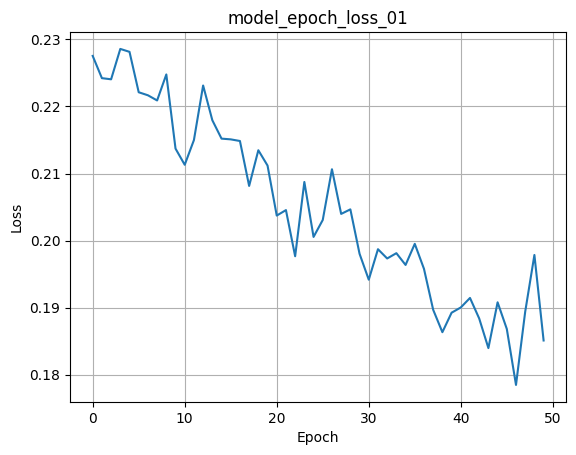

In [21]:
### 손실곡선 : 선그래프로 그리기
# - x축은 반복횟수
# - y축은 손실율

# - 그래프는 saveFig 폴더에 png 확장자를 가지는 이미지로 저장하기

plt.title("model_epoch_loss_01")
plt.plot(history.epoch, history.history["loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_loss_01.png")

plt.show()


### 훈련결과에 대한 정확도 곡선 시각화하기

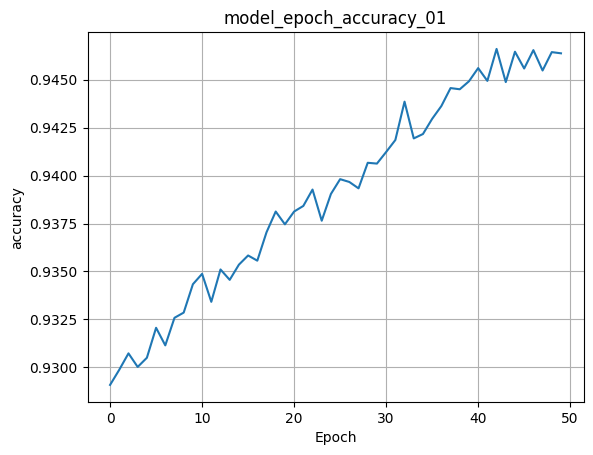

In [22]:
### 정확도 곡선 : 선그래프로 그리기
# - x축은 반복횟수
# - y축은 정확도
plt.title("model_epoch_accuracy_01")
plt.plot(history.epoch, history.history["accuracy"])

plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_accuracy_01.png")

plt.show()

In [23]:
# - 신규모델 생성하여 훈련하기
# - 은닉계층은 출력 100개로 한개 계층 추가
# - 반복횟수는 50회
# - 손실곡선 및 정확도 곡선 그리기

hidden_layer = keras.layers.Dense(units=100, activation="relu")

model = model_fn([hidden_layer])

model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

with tf.device("/CPU:0") :
    history = model.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5308 - accuracy: 0.8108
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3925 - accuracy: 0.8584
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3559 - accuracy: 0.8720
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8791
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.8853
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.8901
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.8942
Epoch 8/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2901 - accuracy: 0.8969
Epoch 9/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.9042
Epoch 10/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.277

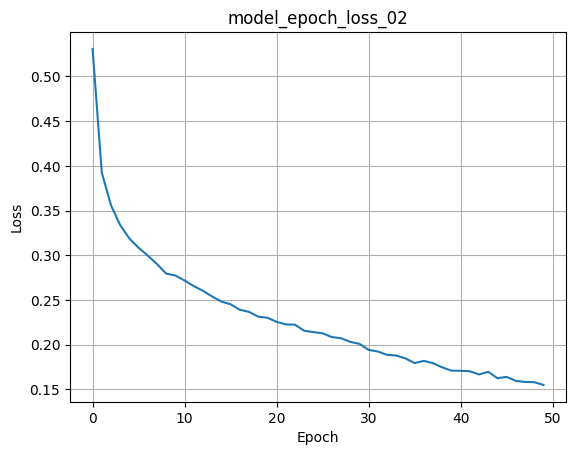

In [24]:
### 손실곡선 : 선그래프로 그리기
# - x축은 반복횟수
# - y축은 손실율

# - 그래프는 saveFig 폴더에 png 확장자를 가지는 이미지로 저장하기

plt.title("model_epoch_loss_02")
plt.plot(history.epoch, history.history["loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_loss_02.png")

plt.show()


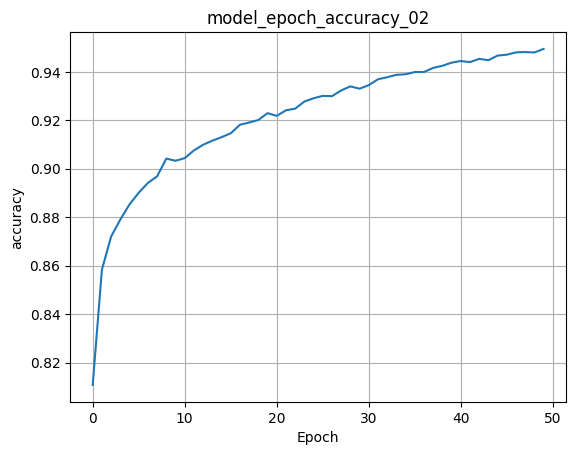

In [25]:
### 정확도 곡선 : 선그래프로 그리기
# - x축은 반복횟수
# - y축은 정확도
plt.title("model_epoch_accuracy_02")
plt.plot(history.epoch, history.history["accuracy"])

plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_accuracy_02.png")

plt.show()

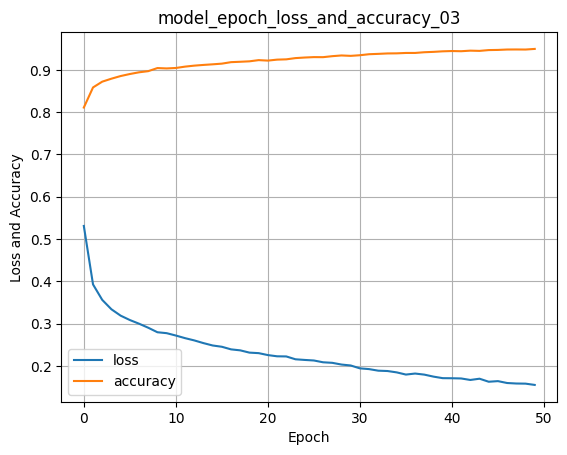

In [26]:
### 손실과 정확도 곡선 : 선그래프로 그리기
# - x축은 반복횟수
# - y축은 손실율 및 정확도

# - 그래프는 saveFig 폴더에 png 확장자를 가지는 이미지로 저장하기

plt.title("model_epoch_loss_and_accuracy_03")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["accuracy"])

plt.xlabel("Epoch")
plt.ylabel("Loss and Accuracy")

plt.legend(["loss", "accuracy"])

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_loss_and_accuracy_03.png")

plt.show()


### 훈련 및 검증 데이터를 모두 사용하여 훈련 시키기

In [27]:
### 은닉계층
hidden_layer = keras.layers.Dense(units=100, activation="relu")

### 모델 생성 함수 호출
model = model_fn([hidden_layer])

### 모델 설정하기
model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

### 훈련 및 검증 데이터를 이용하여 훈련 시키기
# - 훈련시 훈련에 대한 손실/정확도, 검증에 대한 손실/정확도를 모두 출력
with tf.device("/CPU:0") :
    history = model.fit(train_scaled, train_target, epochs=50,
                        validation_data = (val_scaled, val_target))

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5342 - accuracy: 0.8112 - val_loss: 0.4342 - val_accuracy: 0.8474
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8569 - val_loss: 0.4260 - val_accuracy: 0.8436
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8709 - val_loss: 0.3716 - val_accuracy: 0.8683
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8817 - val_loss: 0.3789 - val_accuracy: 0.8707
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8866 - val_loss: 0.3948 - val_accuracy: 0.8658
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8897 - val_loss: 0.3732 - val_accuracy: 0.8737
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8930 - val_loss: 0.3880 - val_accuracy:

In [ ]:
### 훈련 및 검증 손실 곡선 시각화

plt.title("model_epoch_train_and_val_loss_04")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(["train_loss", "val_loss"])

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_train_and_val_loss_04.png")

plt.show()

In [ ]:
### 훈련 및 검증 정확도 곡선 시각화

plt.title("model_epoch_train_and_val_accuracy_05")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])

plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.legend(["train_accuracy", "val_accuracy"])

plt.grid()

### 이미지 저장
plt.savefig("./saveFig/model_epoch_train_and_val_accuracy_05.png")

plt.show()